In [1]:
# Import Required Libraries
import os
import shutil
import pathlib

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# !unzip -qq archive.zip

2023-12-20 20:05:37.090176: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 20:05:37.092845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 20:05:37.139904: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 20:05:37.140668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 20:05:40.201173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Check Tensorflow Version
import tensorflow
tensorflow.__version__

'2.13.1'

In [3]:
# Uncomment if the training, validation and test datasets haven't been created yet
#!unzip -qq archive.zip

In [4]:
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO

IMG_PATH = "./"

# split the data by train/val/test
# ignored = {"pred","Br35H-Mask-RCNN"}
accepted = {"no", "yes"}
# split the data by train/val/test
for CLASS in os.listdir(IMG_PATH):
    if CLASS in accepted:
        if not CLASS.startswith('.'):
            IMG_NUM = len(os.listdir(IMG_PATH +"/"+ CLASS))
            for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH +"/"+ CLASS)):
                img = IMG_PATH+ '/' +  CLASS + '/' + FILE_NAME
                if n < 0.20*IMG_NUM:
                    shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
                elif n < 0.80*IMG_NUM:
                    shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)
                else:
                    shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)

mkdir: cannot create directory ‘TRAIN’: File exists
mkdir: cannot create directory ‘TEST’: File exists
mkdir: cannot create directory ‘VAL’: File exists
mkdir: cannot create directory ‘TRAIN/YES’: File exists
mkdir: cannot create directory ‘TRAIN/NO’: File exists
mkdir: cannot create directory ‘TEST/YES’: File exists
mkdir: cannot create directory ‘TEST/NO’: File exists
mkdir: cannot create directory ‘VAL/YES’: File exists
mkdir: cannot create directory ‘VAL/NO’: File exists


In [5]:
# Set up paths to training, validation and test data
train_dir = './TRAIN'
val_dir = './VAL'
test_dir = './TEST'

In [6]:
# Initialize Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-12-20 20:05:46.439368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-20 20:05:46.745946: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
# Compile Model
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [8]:
# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Training Data Generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1800 images belonging to 2 classes.


In [10]:
# Validation Data Generator
validation_generator = val_datagen.flow_from_directory(val_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 600 images belonging to 2 classes.


In [11]:
# Test Data Generator
test_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 600 images belonging to 2 classes.


In [12]:
# Inspect Data & Labels Batch Shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
# Train the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_original_data.tf",
        save_best_only=True,
        monitor="val_loss",
        save_format="tf")
]
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/10
90/90 [==============================] - ETA: 0s - loss: 0.5226 - acc: 0.7422INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 9s 98ms/step - loss: 0.5226 - acc: 0.7422 - val_loss: 0.4625 - val_acc: 0.7783
Epoch 2/10
90/90 [==============================] - ETA: 0s - loss: 0.4031 - acc: 0.8350INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 91ms/step - loss: 0.4031 - acc: 0.8350 - val_loss: 0.4042 - val_acc: 0.8217
Epoch 3/10
90/90 [==============================] - ETA: 0s - loss: 0.3449 - acc: 0.8600INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 91ms/step - loss: 0.3449 - acc: 0.8600 - val_loss: 0.3197 - val_acc: 0.8617
Epoch 4/10
90/90 [==============================] - ETA: 0s - loss: 0.2920 - acc: 0.8839INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 91ms/step - loss: 0.2920 - acc: 0.8839 - val_loss: 0.3052 - val_acc: 0.8733
Epoch 5/10
90/90 [==============================] - ETA: 0s - loss: 0.2287 - acc: 0.9228INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 92ms/step - loss: 0.2287 - acc: 0.9228 - val_loss: 0.2824 - val_acc: 0.8850
Epoch 6/10
90/90 [==============================] - ETA: 0s - loss: 0.2125 - acc: 0.9217INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 91ms/step - loss: 0.2125 - acc: 0.9217 - val_loss: 0.2334 - val_acc: 0.9217
Epoch 7/10
90/90 [==============================] - 8s 84ms/step - loss: 0.1497 - acc: 0.9606 - val_loss: 0.2359 - val_acc: 0.9033
Epoch 8/10
90/90 [==============================] - ETA: 0s - loss: 0.1251 - acc: 0.9678INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 91ms/step - loss: 0.1251 - acc: 0.9678 - val_loss: 0.1614 - val_acc: 0.9483
Epoch 9/10
90/90 [==============================] - ETA: 0s - loss: 0.0994 - acc: 0.9789INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 91ms/step - loss: 0.0994 - acc: 0.9789 - val_loss: 0.1522 - val_acc: 0.9517
Epoch 10/10
90/90 [==============================] - ETA: 0s - loss: 0.0751 - acc: 0.9844INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_original_data.tf/assets


90/90 [==============================] - 8s 94ms/step - loss: 0.0751 - acc: 0.9844 - val_loss: 0.1444 - val_acc: 0.9533


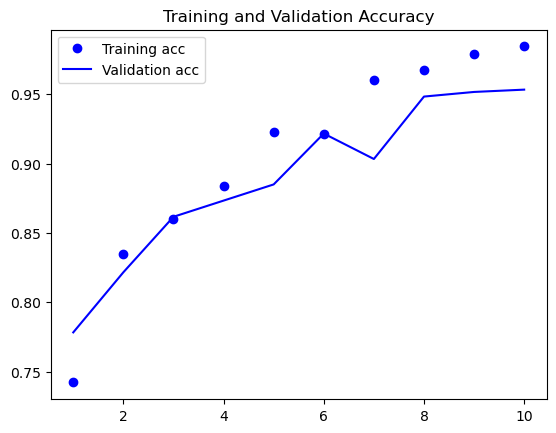

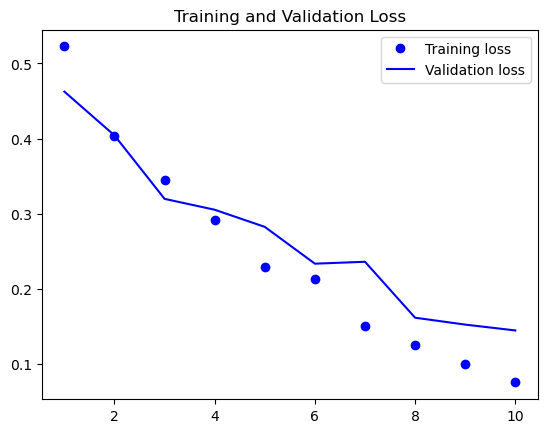

In [14]:
# Plot loss and accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
# Compute Median Training Accuracy
acc_median = np.median(acc)
acc_median

0.922222226858139

In [16]:
# Initialize Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=(0.3, 1.0),
    horizontal_flip=True, 
    vertical_flip=True,     
    fill_mode='nearest')

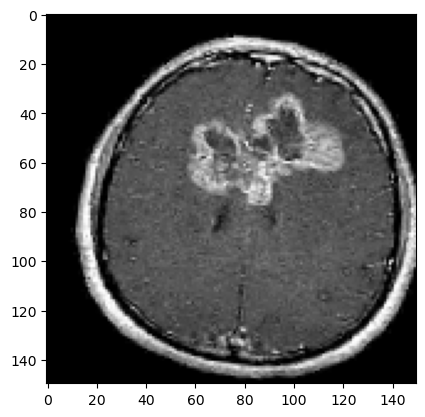

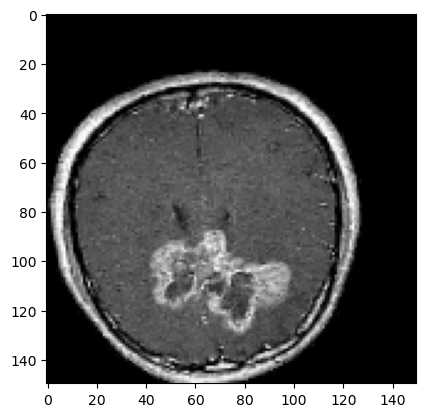

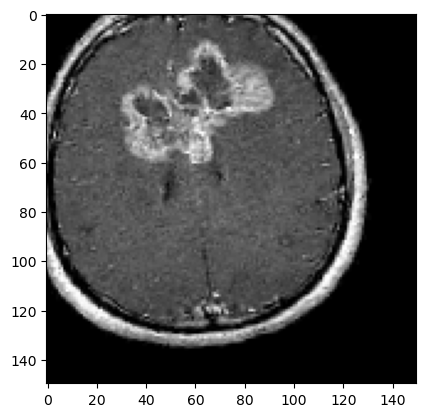

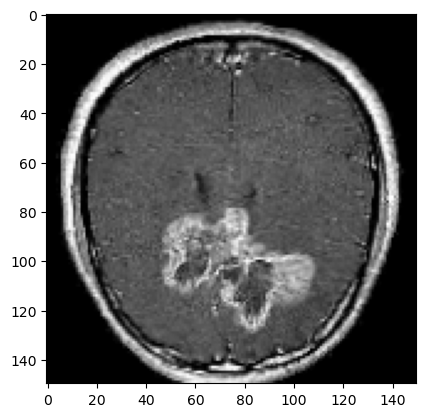

In [17]:
# Plot Input Images
fnames = [os.path.join(train_dir+"/YES", fname) for
    fname in os.listdir(train_dir+"/YES")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [18]:
# Training Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=(0.3, 1.0),
    horizontal_flip=True, 
    vertical_flip=True,     
    fill_mode='nearest')

In [19]:
# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Initialize Training Data Generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1800 images belonging to 2 classes.


In [21]:
# Initialize Validation Data Generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 600 images belonging to 2 classes.


In [22]:
# Train Model With Augmented Data
# Train the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_augmented_data.tf",
        save_best_only=True,
        monitor="val_loss",
        save_format="tf")
]
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/10
57/57 [==============================] - ETA: 0s - loss: 0.6555 - acc: 0.6611INFO:tensorflow:Assets written to: convnet_from_scratch_augmented_data.tf/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_augmented_data.tf/assets


57/57 [==============================] - 15s 260ms/step - loss: 0.6555 - acc: 0.6611 - val_loss: 0.1992 - val_acc: 0.9417
Epoch 2/10
57/57 [==============================] - 14s 248ms/step - loss: 0.5895 - acc: 0.6850 - val_loss: 0.2065 - val_acc: 0.9367
Epoch 3/10
57/57 [==============================] - 14s 248ms/step - loss: 0.5663 - acc: 0.7156 - val_loss: 0.2215 - val_acc: 0.9283
Epoch 4/10
57/57 [==============================] - 14s 249ms/step - loss: 0.5691 - acc: 0.6983 - val_loss: 0.2785 - val_acc: 0.8817
Epoch 5/10
57/57 [==============================] - 14s 247ms/step - loss: 0.5413 - acc: 0.7211 - val_loss: 0.3134 - val_acc: 0.8517
Epoch 6/10
57/57 [==============================] - 14s 248ms/step - loss: 0.5389 - acc: 0.7244 - val_loss: 0.2538 - val_acc: 0.9000
Epoch 7/10
57/57 [==============================] - 14s 249ms/step - loss: 0.5213 - acc: 0.7361 - val_loss: 0.2788 - val_acc: 0.8967
Epoch 8/10
57/57 [==============================] - 14s 246ms/step - loss: 0.523

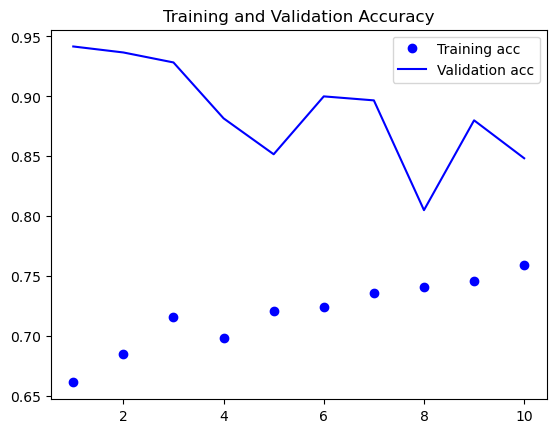

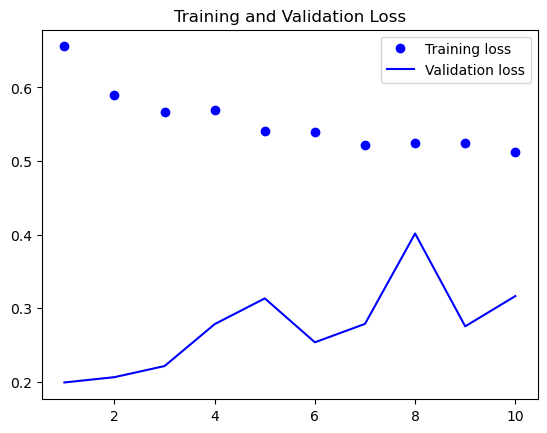

In [23]:
# Inspect Accuracy and Loss
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [24]:
test_model = keras.models.load_model("convnet_from_scratch_original_data.tf")
test_loss, test_acc = test_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.3f}")

30/30 [==============================] - 1s 31ms/step - loss: 0.1852 - acc: 0.9367
Test accuracy: 0.937


In [25]:
test_model = keras.models.load_model("convnet_from_scratch_augmented_data.tf")
test_loss, test_acc = test_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.3f}")

30/30 [==============================] - 1s 32ms/step - loss: 0.2240 - acc: 0.9217
Test accuracy: 0.922
